## Segmentação de um objeto por espaço de cor HSV
### Objetivos:
- Como converter imagens para um espaço de cores HSV (BGR <-> HSV)
- Segmentar um objeto de um video
### Espaço de cor HSV
- Um dos modelos principais e mais utilizados para representação de cor.
- Permite um grande grau de separação entre a cor e a iluminação.
- São os canais para representar a matiz (hue), a saturação (saturation) e o valor (value).

![image.png](images/img.png)

- O componente Value é desagregado da informação de cor, enquanto o Hue e o Saturation estão intimamente relacionados à percepção humana de cores.

## Como encontrar os valores HSV de uma imagem:
É muito simples e você pode usar a mesma função, cv2.cvtColor()
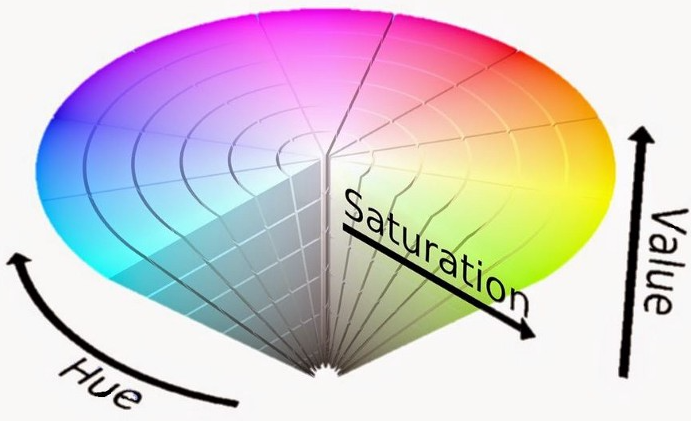

In [ ]:
import numpy as np
import cv2

#Passar padrão BGR
azul = np.uint8([[[255, 0, 0]]])
hsv_azul = cv2.cvtColor(azul, cv2.COLOR_BGR2HSV)

verde = np.uint8([[[0, 255, 0]]])
hsv_verde = cv2.cvtColor(verde, cv2.COLOR_BGR2HSV)

vermelho = np.uint8([[[0, 0, 255]]])
hsv_vermelho = cv2.cvtColor(vermelho, cv2.COLOR_BGR2HSV)

print(f"A cor azul no espaço HSV possui o valor {hsv_azul}" )
print(f"A cor verde no espaço HSV possui o valor {hsv_verde}" )
print(f"A cor vermelho no espaço HSV possui o valor {hsv_vermelho}" )

## Limites superiores e inferiores
- limite inferior: [H-20, 100,100]
- limite superior: [H+20, 255, 255]
- Ferramenta de edição de imagem como o GIMP ou qualquer conversor online

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    hsv =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lim_inf = np.array([100, 100, 100])
    lim_sup = np.array([140, 255, 255])

    color_mask = cv2.inRange(hsv, lim_inf, lim_sup)

    (couts,hir) = cv2.findContours(color_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cout in couts:
        area = cv2.contourArea(cout)

        if (area > 800):
            x,y,w,h = cv2.boundingRect(cout)
            frame = cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)



    cv2.imshow('Mascara', color_mask)
    cv2.imshow('ObjectDetctionTrack', frame)

    # esc para sair
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
cap.release()